<a href="https://www.kaggle.com/code/stutiiikatariaaa/datasetanalysis?scriptVersionId=270016369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
df = pd.read_csv('/kaggle/input/solargeneration/dataset.csv')
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Check missing values per column
print(df.isnull().sum())

date_time                         0
hours                             0
temperature                       0
Humidity                          0
Ground_radiation_intensity        0
atmosphere_radiation_intensity    0
Photovoltaic_power_generation     0
dtype: int64


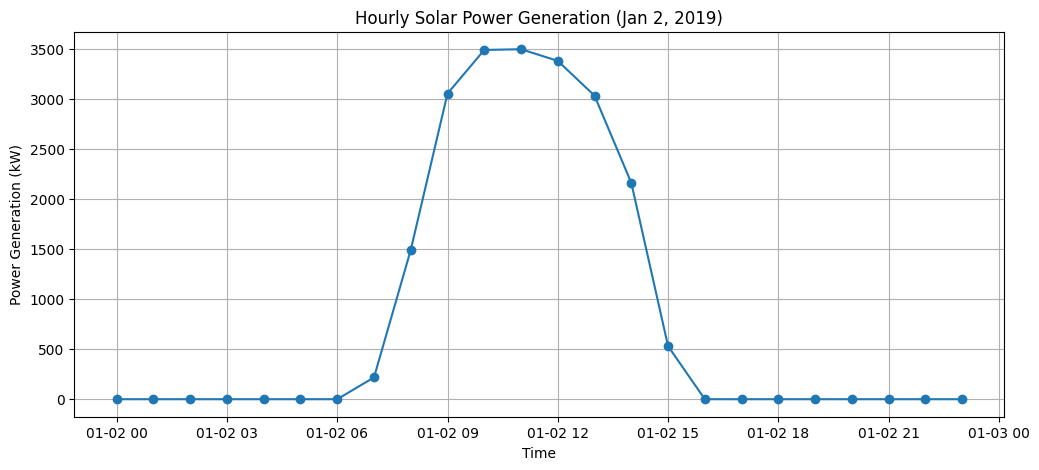

In [2]:
# Plot a single day (e.g., Jan 1, 2019)
single_day = df[df['date_time'].dt.date == pd.to_datetime('2019-01-02').date()]

plt.figure(figsize=(12, 5))
plt.plot(single_day['date_time'], single_day['Photovoltaic_power_generation'], marker='o')
plt.title("Hourly Solar Power Generation (Jan 2, 2019)")
plt.xlabel("Time")
plt.ylabel("Power Generation (kW)")
plt.grid()
plt.show()

In [ ]:
# Plot first 7 days
first_week = df.iloc[:7*24]  # First 7 days (24 hours each)

plt.figure(figsize=(12, 5))
plt.plot(first_week['date_time'], first_week['Photovoltaic_power_generation'])
plt.title("Solar Power Generation Over a Week (Jan 1-7, 2019)")
plt.xlabel("Time")
plt.ylabel("Power Generation (kW)")
plt.grid()
plt.show()

In [ ]:
# Select numerical features
numeric_cols = ['temperature', 'Humidity ', 'Ground_radiation_intensity ', 
                'atmosphere_radiation_intensity', 'Photovoltaic_power_generation']

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Extract hour of day and aggregate
df['hour'] = df['date_time'].dt.hour
hourly_avg = df.groupby('hour')['Photovoltaic_power_generation'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar')
plt.title("Average Power Generation by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Power Generation (kW)")
plt.grid()
plt.show()


In [ ]:
# Extract month and aggregate
df['month'] = df['date_time'].dt.month
monthly_avg = df.groupby('month')['Photovoltaic_power_generation'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar')
plt.title("Average Power Generation by Month")
plt.xlabel("Month")
plt.ylabel("Average Power Generation (kW)")
plt.grid()
plt.show()

In [ ]:
# Resample to daily averages
daily_avg = df.set_index('date_time').resample('D')['Photovoltaic_power_generation'].mean()

plt.figure(figsize=(12, 5))
daily_avg.plot()
plt.title("Daily Average Solar Power Generation (Jan - Mar 2019)")
plt.xlabel("Date")
plt.ylabel("Average Power Generation (kW)")
plt.grid()
plt.show()